# Review: 회귀

## 1. 회귀란?
- 정의: 연속적인 데이터에서 패턴을 찾아내는 통계적 방법
- 종류: 선형회귀, 비선형 회귀, 로지스틱회귀, 릿지회귀, 라쏘회귀, 다항회귀
- 활용: 데이터 요약, 예측, 시계열 모델링 및 변수 간 인과관계 발견 등
- 평가지표 : MSE, MAE, R-square, Adjusted R-square, AIC, BC(SC)

회귀 => 데이터분석의 유용한 통계적 도구이자 ML/DL 이해의 밑바탕

## 2. 단순/다중선형회귀분석
- 단순선형회귀분석
  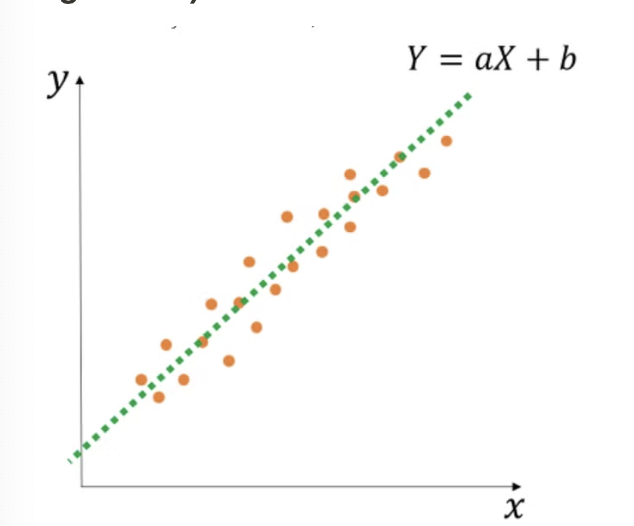
- 다중선형회귀분석
  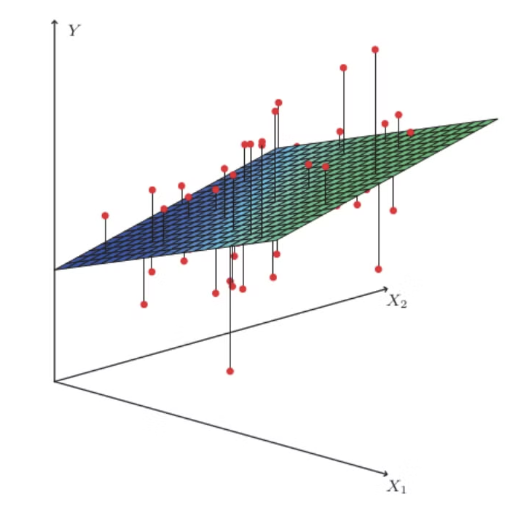    
=> 설명변수 개수에 차이가 있을 뿐, 본질적으로 같음

## 3. 최소 제곱법, 최소자승법 (OLS)
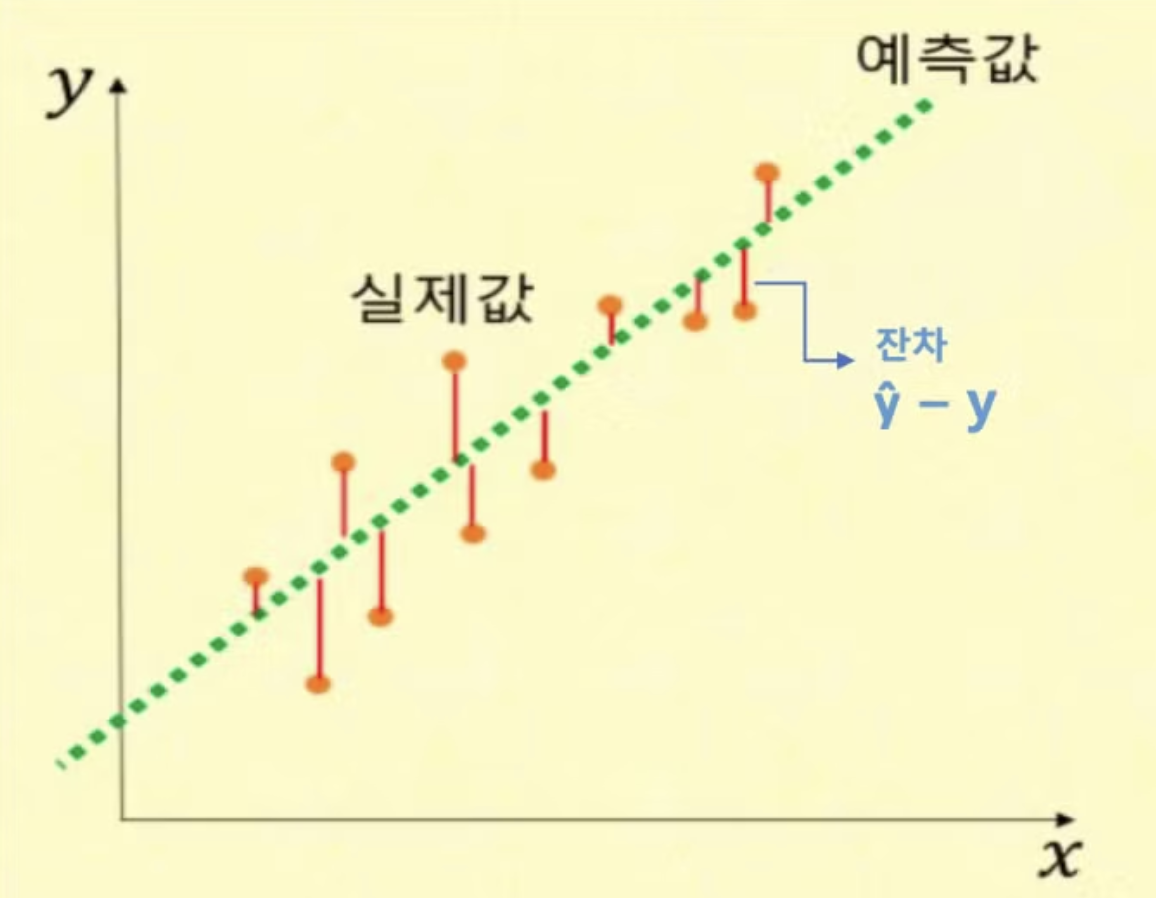

- 잔차의 제곱의 합을 최소화하는 회귀선을 찾는 방법
- 회귀선 - 관측된 데이터값 = 잔차

# 선형회귀

## 1. 다중선형회귀의 수식적 이해
- 가장 일반적인 형태 : 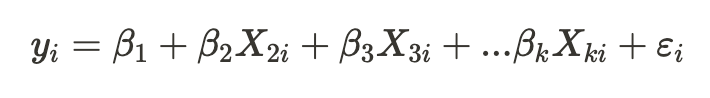
- 상수항과 오차항 제외 : 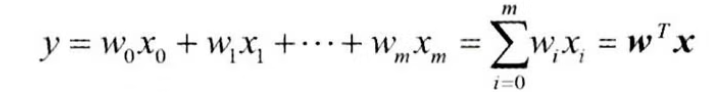

-> 선형회귀식 = 종속변수y에 대한 설명변수의 가중평균
-> 설명변수에 가중치를 곱해 더함으로써 y를 얼마나 잘 설명하는지 나타냄


## 2. 다중선형회귀의 기본가정

#### 가정1: 선형성
> 📈 $E(y|x) = \beta_1+\beta_2X_i$

#### 가정2: 오차항의 평균은 0이다
> $E(\varepsilon_i|X_i) = 0$

#### 가정3: 독립성(Independence)
> X_i, X_j \ is \ linearly\ independent \ for\ all \ i,j

- 선형독립적이지 않은 경우 다중공산성이 있다고 함

#### 가정4: 등분산성(Homoscedasticity)
> Var(\varepsilon_i|X_i) = \sigma^2

- 오차항의 분산이 일정해야 한다는 가정
- 등분산성을 알아보는 방법 -> 잔차의 도표화/검정

#### 가정5: 오차항은 자기상관되어 있지 않다
> Cov(\varepsilon_i, \varepsilon_j|X_i) =0

- 오차항의 공분산은 항상 0이어야 한다는 가정
- 0이 아닐 경우 자기상관이 있다고 함(시계열 자료에서 많이 나타남)
- 자기상관 알아보는 법 -> 더빈-왓슨 검정 / ACF, PACF 함수

#### 가정6: 정규성(normality)
> $\varepsilon_i \sim N(0, \sigma^2)$

-> 위배되어도 다중선형회귀분석의 결과에 큰 영향 주지 X

## 3. 회귀분석 평가방법
-> 회귀선을 데이터와 함께 시각화하거나 통계지표를 활용하면 됨

#### 01. 시각화
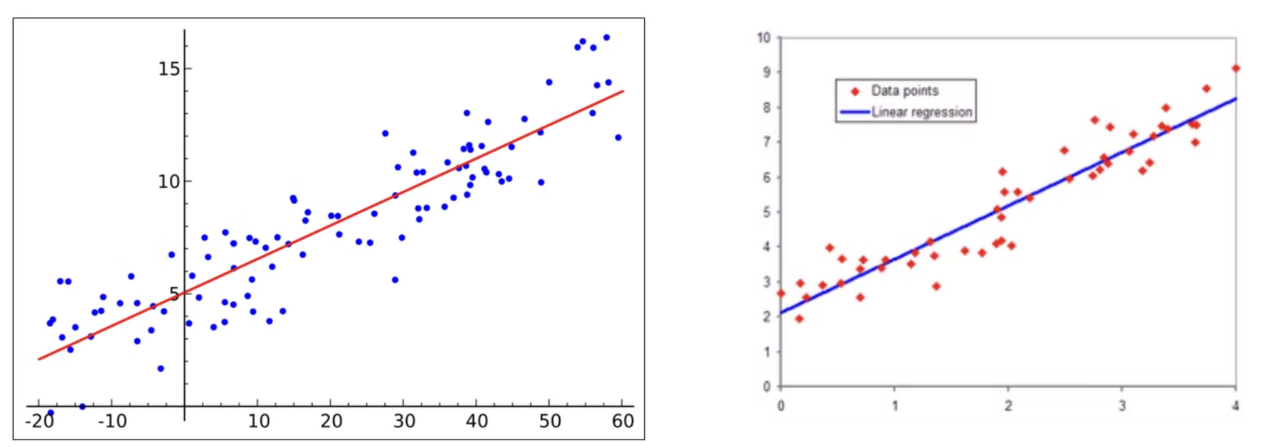

- 회귀선이 데이터 전반을 잘 요약하지만, 어느 회귀선이 더 잘 요약하는지 비교하기 위해 통계지표 활용

#### 02. 통계지표
- 결정 계수(R-squared)
  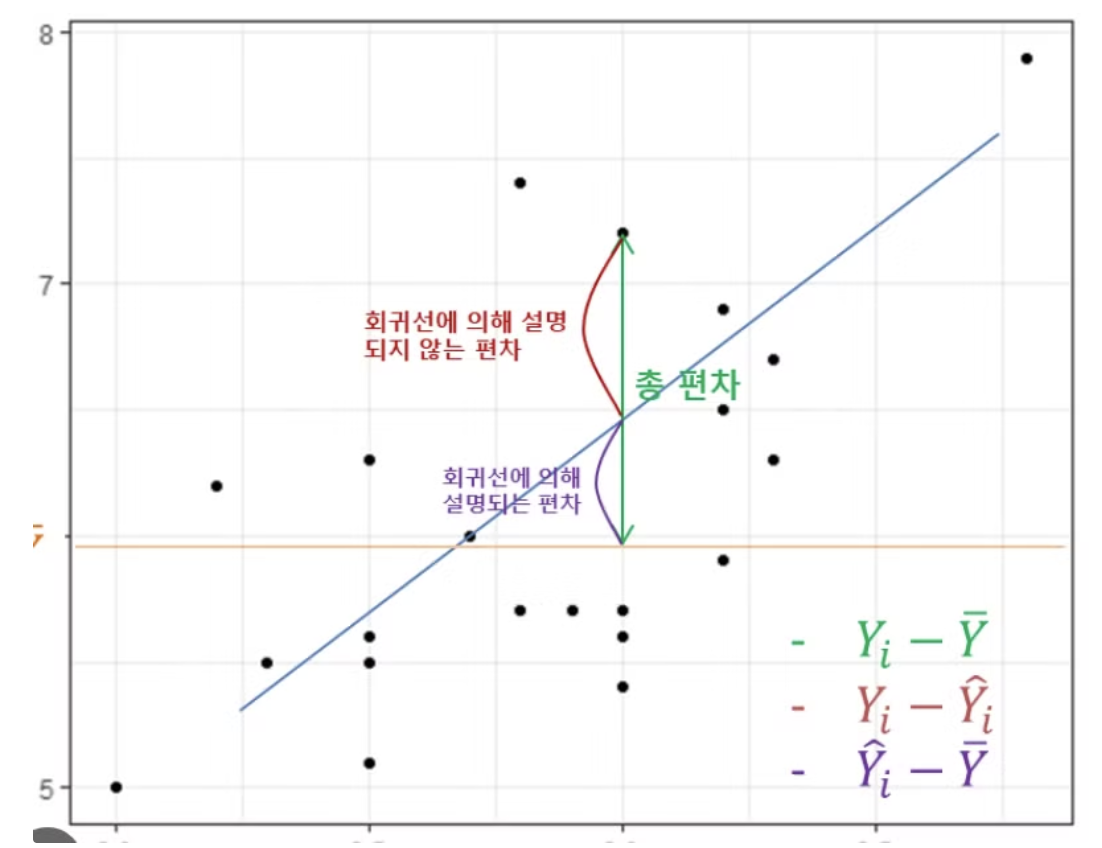
  - 회귀 분석에서 모델이 설명하는 데이터의 총 변동 중 설명된 비율
  - 노란색 선으로 표시된 전체 데이터가 평균
  - 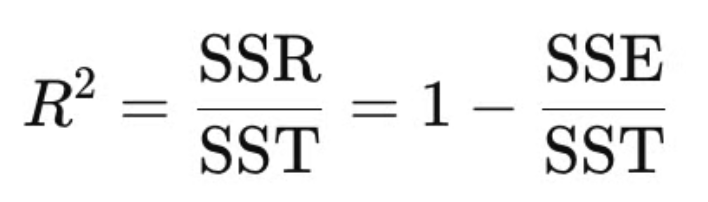
  - 1에 가까울수록 SSR과 SST의 값이 비슷해지고 SSE는 0에 가까워짐 <BR><BR>

- 조정된 결정 계수(Adjusted R-squared)
  - R^2는 설명변수의 개수가 증가하면 증가할수록 자연스레 증가 -> 데이터와 큰 관련성이 없는 변수를 추가해도 높아짐.
  - => Adjusted R^2
  - 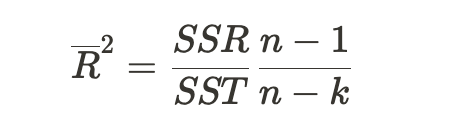
  - : 변수 개수 증가하면 전체 값 감소. 즉, 변수 개수에 따른 설명력 추가 부분을 상쇄하는 효과<BR><BR>

- AIC, BIC    
  : 정보기준이라고도 불리며 값이 낮을수록 좋음
  - AIC = Akaike information criterion
    - BIC에 비해 복잡성에 대한 패널티가 비교적 작음
  - BIC : SC = Schwarz Criterion, BIC = Bayesian Information Criterion
    - AIC보다 더 엄격한 기준. 데이터의 양에 따라 더 강한 페널티가 부과됨



# 비선형회귀
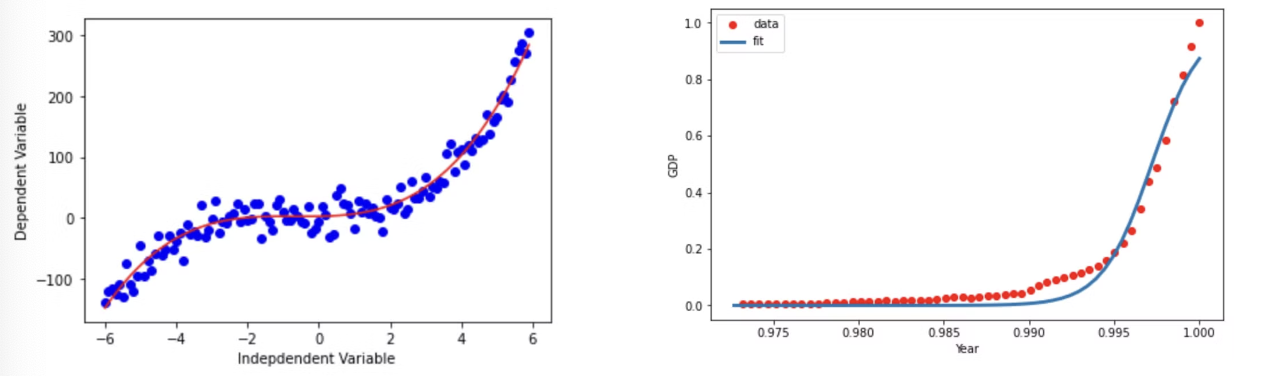
-> 데이터셋의 분포가 선형적이지 X

## 1. 다항식 회귀모델
-> 선형 모델의 feature을 다항식으로 만들어 선형 회귀 사용
- 기존의 변수들을 다항식으로 만드는 코드<BR>
  ```python
  from sklearn.preprocessing import PolynomialFeatures
  poly = PolynomialFeatures() #x1,x2를 2차항화
  poly.fit([[2, 3]])
  poly = PolynomialFeatures(include_bias=False) #상수항 제외
  poly.fit(train_input) 
  test_poly = poly.transform(test_input) 
  ```
  <BR>
- 그 다음에 scikit-learn의 선형회귀 클래스를 똑같이 이용<BR>
  ```python
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(train_poly, train_target)
  print(lr.score(train_poly, train_target))
  ```
  <BR>

- 장점
 : 선형 모델에 비해 회귀선을 잘 fit하도록 그릴 수 있음    
- 단점
 : 너무 많은 feature을 이용하면 결과가 overfitting될 수 있음

## 2. 지수/로그 회귀모델(Exponential/log regression model)
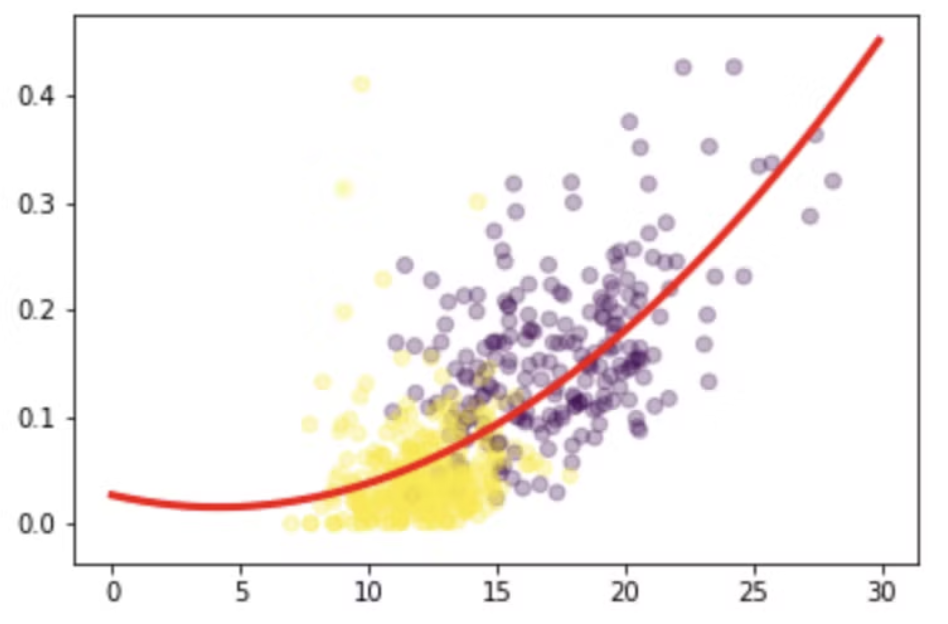
- 데이터를 분석하다보면 어떤 칼럼의 증/감소 형태가 지수적으로 or 그 역인 경우가 있음 -> 회귀선을 긋고 싶다면 지수/로그 식 이용